**Autoenoders**
An autoencoder is a type of artificial neural network used for unsupervised learning. Its primary goal is to learn a compressed representation of input data, and it does this by encoding the data into a lower-dimensional latent space and then decoding it back to its original form. The entire process is meant to capture the most salient features of the data.

**The autoencoder structure**:
   - **Encoder**: This part of the network compresses the input into a latent-space representation. It encodes the input data as an internal fixed-size representation in reduced dimensionality.
   - **Latent Space**: This is the compressed representation of the input data. It holds the key features necessary to reconstruct the input data.
   - **Decoder**: This part of the network reconstructs the input data from the internal representation. It maps the encoded data back to the original space.


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0502 - val_loss: 0.0238
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0179 - val_loss: 0.0131
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0110 - val_loss: 0.0087
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0030 - val_loss: 0.0028
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


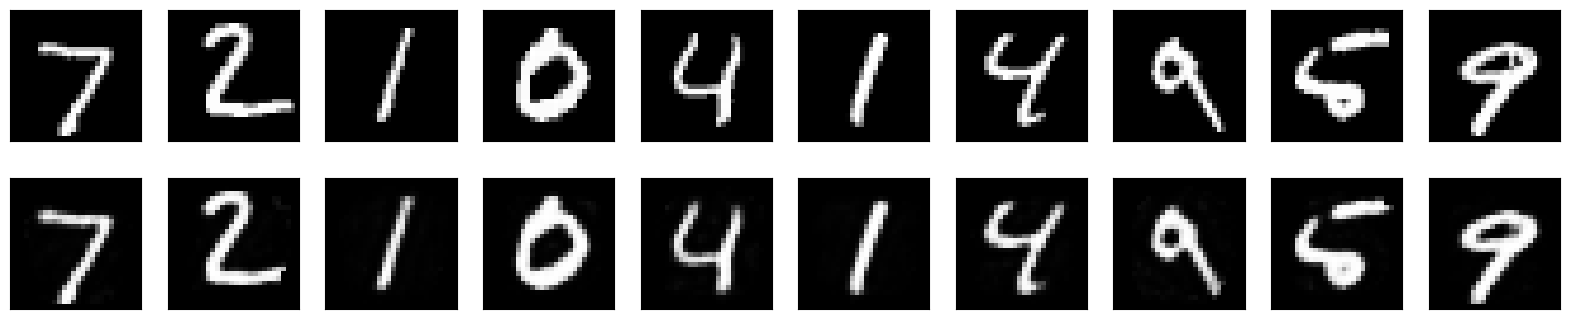

In [1]:
# Necessary Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Data Preprocessing
## Normalize the pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
## Flatten the 28x28 images to a 784 vector for each image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Autoencoder Architecture
## Input layer
input_img = Input(shape=x_train.shape[1:])
## Encoding layer
encoded = Dense(128, activation='relu')(input_img)
## Decoding layer
decoded = Dense(np.prod(x_train.shape[1:]), activation='sigmoid')(encoded)

# Construct the Autoencoder Model
autoencoder = Model(input_img, decoded)

# Compile the model with MSE loss and adam optimizer
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
## We're using the training images both as input and target since autoencoders are unsupervised
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Using the trained Autoencoder to reconstruct test images
encoded_imgs = autoencoder.predict(x_test)

# Visualization
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Variational Autoencoder**
Variational Autoencoders (VAEs) are a type of autoencoder that introduces probabilistic reasoning and optimization techniques from variational inference to create a generative model. While standard autoencoders are trained to minimize the reconstruction error between the input data and their output, VAEs aim to generate new samples that could have been produced by the input data.

**The variational autoencoder structure:**

- **Encoder**: Like traditional autoencoders, VAEs have an encoder that maps the input data to a latent space. However, instead of encoding the input as a single fixed point in the latent space, the VAE encoder outputs parameters of a probability distribution (usually Gaussian) over the latent space.
- **Sampling**: A sample is drawn from this distribution to provide a randomized latent space representation of the input. This introduces a stochastic element that aids in generating diverse outputs.
- **Decoder**: The sampled latent point is then passed through the decoder to generate a reconstruction of the input

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 784)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 256)               │         200,960 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_mean (Dense)                │ (None, 10)                │           2,570 │ dense_34[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_log_var (Dense)             │ (None, 10)                │           2,570 │ dense_34[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z (Lambda)                    │ (None, 10)                │               0 │ z_mean[0][0],              │
│                               │                           │                 │ z_log_var[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 206,100 (805.08 KB)

 Trainable params: 206,100 (805.08 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,304 (798.06 KB)

 Trainable params: 204,304 (798.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 178ms/step - kl_loss: 2.9780 - loss: 35.1461 - reconstruction_loss: 32.1677 - val_kl_loss: 3.7135 - val_loss: 29.5211 - val_reconstruction_loss: 25.8002
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - kl_loss: 4.2625 - loss: 29.2793 - reconstruction_loss: 25.0166 - val_kl_loss: 4.6487 - val_loss: 28.4434 - val_reconstruction_loss: 23.7879
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - kl_loss: 4.9400 - loss: 28.5372 - reconstruction_loss: 23.5971 - val_kl_loss: 5.0780 - val_loss: 27.9515 - val_reconstruction_loss: 22.8661
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - kl_loss: 5.3261 - loss: 28.1645 - reconstruction_loss: 22.8384 - val_kl_loss: 5.4841 - val_loss: 27.6467 - val_reconstruction_loss: 22.1556
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - kl_loss: 5.5454 - loss: 27.9191 - reconstruction_loss: 22.3736 - val_kl_loss: 5.6233 - val_loss: 27.4878 - val_reconstruction_loss: 21.8570
Epoch 6/10
469/

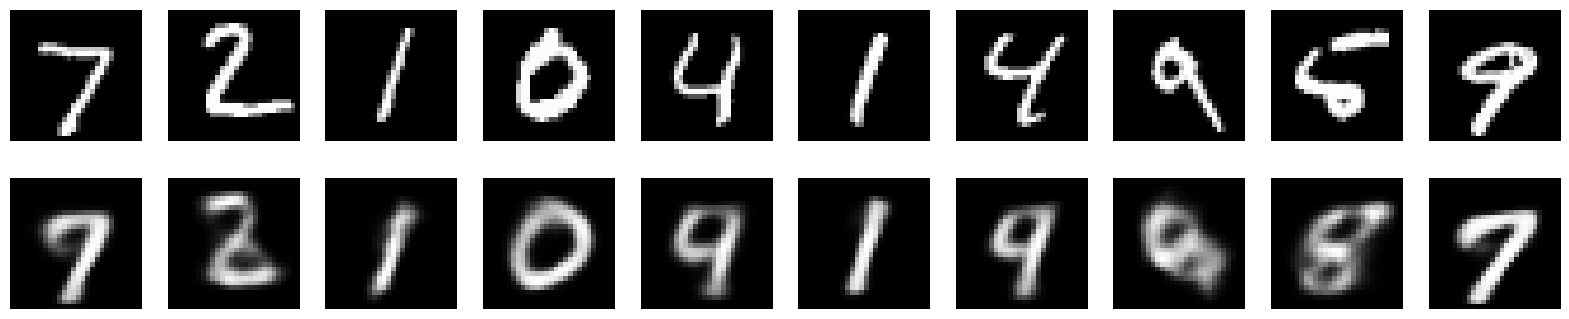

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


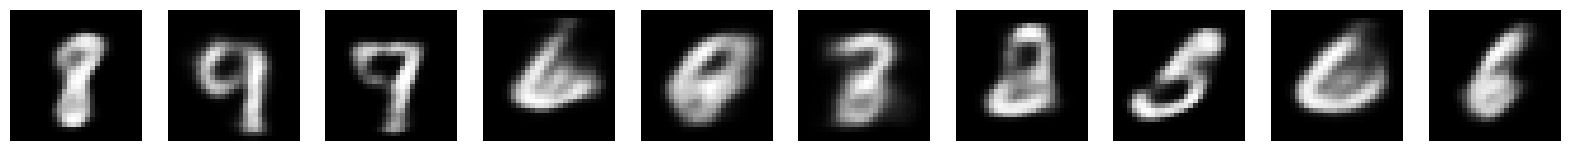

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, ops
import matplotlib.pyplot as plt

# ------------------------------
# 1️⃣ Load and preprocess MNIST
# ------------------------------
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

input_dim = x_train.shape[1]  # 784
latent_dim = 10  # latent space size

# ------------------------------
# 2️⃣ Encoder
# ------------------------------
encoder_inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(256, activation="relu")(encoder_inputs)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

def sampling(args):
    """Reparameterization trick."""
    z_mean, z_log_var = args
    epsilon = keras.random.normal(shape=(ops.shape(z_mean)[0], latent_dim))
    return z_mean + ops.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# ------------------------------
# 3️⃣ Decoder
# ------------------------------
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(256, activation="relu")(latent_inputs)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# ------------------------------
# 4️⃣ Custom VAE model
# ------------------------------
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer):
        # run_eagerly lets us handle losses manually
        super().compile(run_eagerly=True)
        self.optimizer = optimizer
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        """Forward pass (used for inference/predict)."""
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def compute_losses(self, data):
        """Shared logic for train/test step."""
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)

        reconstruction_loss = keras.losses.binary_crossentropy(data, reconstruction)
        reconstruction_loss = ops.sum(reconstruction_loss, axis=-1)
        kl_loss = -0.5 * ops.sum(
            1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var), axis=-1
        )
        total_loss = ops.mean(reconstruction_loss + kl_loss)
        return total_loss, reconstruction_loss, kl_loss

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            total_loss, reconstruction_loss, kl_loss = self.compute_losses(data)

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        total_loss, reconstruction_loss, kl_loss = self.compute_losses(data)

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# ------------------------------
# 5️⃣ Train the model
# ------------------------------
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=10, batch_size=128, validation_data=(x_test,))

# ------------------------------
# 6️⃣ Reconstruct test digits
# ------------------------------
decoded_imgs = vae.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

# ------------------------------
# 7️⃣ Sample new random digits
# ------------------------------
n = 10
random_latent_vectors = np.random.normal(size=(n, latent_dim))
generated_images = vae.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()
